<a href="https://colab.research.google.com/github/dxda6216/q10/blob/main/Copy_of_circadian_period_q10_for_cyano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circadian period Q<sub>10</sub> calculator for cyano


Temperature =  [25.2 25.2 25.2 27.5 27.5 27.5 29.5 29.5 29.5 32.  32.  32.  34.1 34.1
 34.1 35.8 35.8 35.8]
Period =  [34.4 33.1 32.9 30.8 30.1 29.9 27.3 27.1 27.7 24.8 24.3 24.1 21.3 20.8
 20.1 19.7 18.5 18.7] 

Tau30 (estimated period length at 30°C) = 26.322 ± 0.165
Q10 (temperature coefficient) = 1.696 ± 0.029 



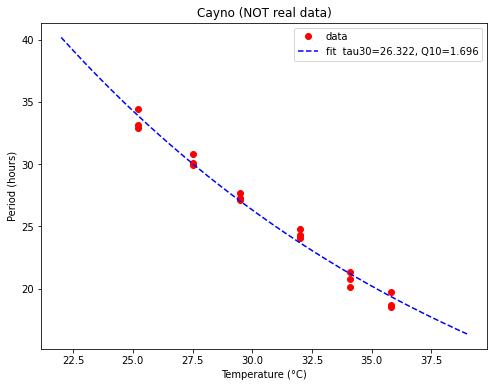

In [ ]:
### This is a simple script to calculate Q10 values for circadian period
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Data description (plot title)
Data_description = "Cayno (NOT real data)" #@param {type:"string"}

# Temperature data
Temperatures = 25.2, 25.2, 25.2, 27.5, 27.5, 27.5, 29.5, 29.5, 29.5, 32.0, 32.0, 32.0, 34.1, 34.1, 34.1, 35.8, 35.8, 35.8 #@param {type:"raw"}
x = np.array(Temperatures) 

# Period data
Periods =  34.4, 33.1, 32.9, 30.8, 30.1, 29.9, 27.3, 27.1, 27.7, 24.8, 24.3, 24.1, 21.3, 20.8, 20.1, 19.7, 18.5, 18.7 #@param {type:"raw"}
y = np.array(Periods)

# Printing the data
print('Temperature = ', x)
print('Period = ', y, '\n')

# Figure Settings ON of OFF
Set_graphical_parameters_of_figure = "No (Graph axes, tick marks, etc will automatically be adjusted)" #@param ["No (Graph axes, tick marks, etc will automatically be adjusted)", "Yes (Set the parameters)"]

# Figure graphical_parameter settings
# psx[0] : figure size - width
# psx[1] : figure size - height
# psx[2] : X-axis scale - min
# psx[3] : X-axis scale - max
# psx[4] : X-axis ticks - starting
# psx[5] : X-axis ticks - ending
# psx[6] : X-axis ticks - interval
# psx[7] : Y-axis scale - min
# psx[8] : Y-axis scale - max
# psx[9] : Y-axis ticks - starting
# psx[10] : Y-axis ticks - ending
# psx[11] : Y-axis ticks - interval
# psx[12] : Fitted curve - starting
# psx[13] : Fitted curve - ending
Figure_graphical_parameters =  8, 6, 27, 45, 28, 45, 2, 14, 45, 14, 45, 2, 28, 43 #@param {type:"raw"}
psx = np.array(Figure_graphical_parameters)

# Displaying Tab-delimited data Yes or No
Display_tab_delimited_data = "No" #@param ["No", "Yes"]

# Defining an equation for curve fitting
# fitting parameters:
#     tau30 : period at 30 degree Celsius
#     q10 : temperature coefficient (Q10)
def func(x, tau30, q10):
	return tau30 / ( q10 ** ( ( x - 30 ) * 0.1 ) )

# Initial values for the fitting parameters
p0 = np.array([24.000, 1.000])

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, x, y, p0)

# Printing the results
print(u'Tau30 (estimated period length at 30\u00B0C) =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5))
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5), '\n')

# Plotting data and fitted curve
if Set_graphical_parameters_of_figure == "Yes (Set the parameters)":
	fig = plt.figure(figsize = (psx[0],psx[1]))
	fcx = np.linspace(psx[12], psx[13], 200)
	if psx[4] < psx[2]:
		psx[4] = psx[2]
	if psx[5] >= psx[3]:
		psx[5] = psx[3] + 1
	if psx[9] < psx[7]:
		psx[9] = psx[7]
	if psx[10] >= psx[8]:
		psx[10] = psx[8] + 1
	plt.xlim(psx[2], psx[3])
	plt.ylim(psx[7], psx[8])
	plt.xticks(np.arange(psx[4], psx[5], psx[6]))
	plt.yticks(np.arange(psx[9], psx[10], psx[11]))
else:
	fig = plt.figure(figsize = (8,6))
	fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.250 )
	fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.250 ) + 1
	fcx = np.linspace(fcxmin, fcxmax, 200)
	
plt.plot(x, y, 'o', color ='red', label ='data')
fcy = func(fcx, popt[0], popt[1])	
plt.plot(fcx, fcy, '--', color='blue', label ='fit  tau30=%5.3f, Q10=%5.3f' % tuple(popt))
plt.title(Data_description)
plt.xlabel(u'Temperature (\u00B0C)')
plt.ylabel('Period (hours)')

if Display_tab_delimited_data == "Yes":
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	ycount = 0
	for xseq in x:	
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	fcycount = 0
	for fcxseq in fcx:	
		print('{:.3f}'.format(fcxseq)+'\t'+'{:.3f}'.format(fcy[fcycount]))
		fcycount += 1
	print(u'\n')

plt.legend()
plt.show()

### End of script